In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import figure, show
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors

2017-08-06 20:45:11


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [3]:
from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.core.core_functions import loc_elem_1d

from invisible_cities.types.ic_types          import Counter
from invisible_cities.evm.pmaps import S1
from invisible_cities.evm.pmaps import S2
from invisible_cities.evm.pmaps import S2Si
from invisible_cities.database import load_db

In [4]:
from   invisible_cities.icaro.mpl_functions   import draw_pmt_map
import invisible_cities.icaro.mpl_functions as mpl
from   invisible_cities.icaro.pmaps_mpl import plot_s12
from invisible_cities.icaro.pmaps_mpl import plot_s2si_map

In [179]:
from invisible_cities.icaro.hvt_mpl import draw_voxels
from invisible_cities.icaro.hvt_mpl import draw_voxels2
from invisible_cities.icaro.hvt_mpl import plot_hits_3D
from invisible_cities.icaro.hvt_mpl import draw_tracks
import invisible_cities.icaro.hvt_mpl as hvt

In [6]:
from invisible_cities.io                       import pmap_io          as pio
from invisible_cities.reco                     import tbl_functions    as tbl

In [7]:
from invisible_cities.filters.s1s2_filter    import S12Selector
from invisible_cities.filters.s1s2_filter    import s2si_filter
from invisible_cities.filters.s1s2_filter    import s1s2_filter

In [8]:
from invisible_cities.core.configure          import configure

In [9]:
from invisible_cities.evm.event_model import HitCollection
from invisible_cities.evm.event_model import Hit
from invisible_cities.evm.event_model import Voxel
from invisible_cities.evm.event_model import BHit

from invisible_cities.evm.event_model import Track
from invisible_cities.evm.event_model import Blob
from invisible_cities.evm.event_model import TrackCollection
from invisible_cities.evm.event_model import VoxelCollection

In [10]:
from invisible_cities.reco                     import pmaps_functions  as pmp
from invisible_cities.reco                     import pmaps_functions_c  as cpmp

In [11]:
from invisible_cities.core.exceptions         import SipmEmptyList

In [12]:
from invisible_cities.reco.xy_algorithms         import barycenter
from invisible_cities.reco.xy_algorithms         import corona

In [13]:
import invisible_cities.reco.paolina_functions as plf
import invisible_cities.reco.paolina_functions as paf

In [14]:
from itertools   import combinations

In [15]:
from typing import Sequence
from typing import List
from typing import Dict
from typing import Tuple

In [16]:
def compute_xy_position(s2sid_peak, slice_no, algo='corona'):    
    IDs, Qs  = cpmp.sipm_ids_and_charges_in_slice(s2sid_peak, slice_no)
    xsi, ysi   = xs[IDs], ys[IDs]
    
    if algo == 'barycenter':
        try:
            return barycenter(np.stack((xsi, ysi)).T, Qs)
        except SipmEmptyList:
            return None
    else:
        try:
            return corona(np.stack((xsi, ysi)).T, Qs)
        except SipmEmptyList:
            return None




In [17]:
def split_energy(e, clusters):
    if len(clusters) == 1:
        return [e]
    qs = np.array([c.Q for c in clusters])
    return e * qs / np.sum(qs)


In [18]:
def max_events_reached(nmax, n_events_in):
    if nmax < 0:
        return False
    if n_events_in == nmax:
        print('reached max nof of events (= {})'
                  .format(nmax))
        return True
    return False


In [19]:
def get_vox(hits, qq):
    x, y, z, q = [], [], [], []
    for hit in hits:
        x.append(hit.X)
        y.append(hit.Y)
        z.append(hit.Z)
        q.append(qq)
    return x,y,z,q




In [22]:
run_number = -4446
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
xpmt = DataPMT.X.values
ypmt = DataPMT.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)


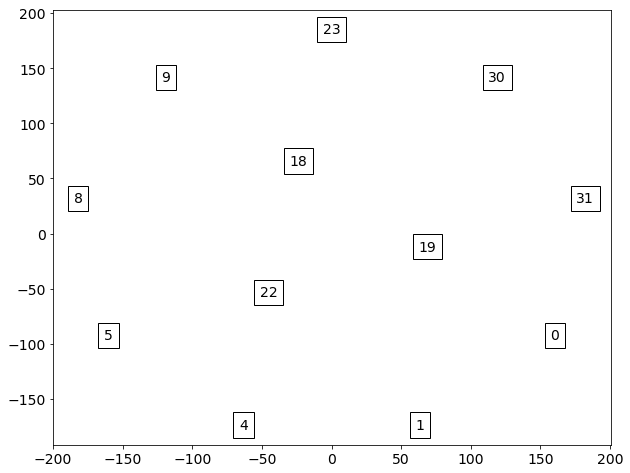

In [23]:
draw_pmt_map(-4446)

In [24]:
conf = configure(['none','/Users/jjgomezcadenas/Projects/IC/invisible_cities/config/s12_selector.conf'])

In [25]:
conf.as_dict['s1_wmax'] = 550
conf.as_dict['s2_nsipmmax'] = 300

In [26]:
conf.as_dict

{'config_file': '/Users/jjgomezcadenas/Projects/IC/invisible_cities/config/s12_selector.conf',
 'drift_v': 0.001,
 'full_files': False,
 'hide_config': False,
 'no_files': False,
 'no_overrides': False,
 'print_config_only': False,
 'run_all': False,
 's1_emax': 1000000.0,
 's1_emin': 0,
 's1_ethr': 0.5,
 's1_hmax': 1000000.0,
 's1_hmin': 0,
 's1_nmax': 1,
 's1_nmin': 1,
 's1_wmax': 550,
 's1_wmin': 100.0,
 's2_emax': 1000000.0,
 's2_emin': 0,
 's2_ethr': 1,
 's2_hmax': 1000000.0,
 's2_hmin': 0,
 's2_nmax': 10,
 's2_nmin': 1,
 's2_nsipmmax': 300,
 's2_nsipmmin': 1,
 's2_wmax': 10000000.0,
 's2_wmin': 3000.0,
 'skip': 0,
 'verbosity': 0}

In [27]:
s1s2_selector = S12Selector(**conf.as_dict)

In [28]:
s1s2_selector

S12_selector(s1n = minmax(min=1.0, max=1.0) s1e = minmax(min=0.0, max=1000000.0) pes s1w = minmax(min=100.0, max=550.0) ns pes s1h = minmax(min=0.0, max=1000000.0) pes s1_ethr = 0.5 pes
            s2n = minmax(min=1.0, max=10.0) s2e = minmax(min=0.0, max=1000000.0)  s2w = minmax(min=3000.0, max=10000000.0) ns pes s2h = minmax(min=0.0, max=1000000.0) pes nsipm = minmax(min=1.0, max=300.0) s2_ethr = 1 pes
            

### Read data

In [29]:
PMP_file = os.path.join(os.environ['IC_DATA'],'/Users/jjgomezcadenas/Projects/ICDATA/MC_PreProd_July_2017',
                        'electrons.2615keV_PMP.z250mm.10evts.h5'.format(run_number, run_number))
print('PMP file = {}'.format(PMP_file))

PMP file = /Users/jjgomezcadenas/Projects/ICDATA/MC_PreProd_July_2017/electrons.2615keV_PMP.z250mm.10evts.h5


In [30]:
s1_dict, s2_dict, s2si_dict = pio.load_pmaps(PMP_file)

In [31]:
event_numbers, timestamps = tbl.get_event_numbers_and_timestamps_from_file_name(PMP_file)


In [32]:
s1_dict.keys()

dict_keys([35185840, 35185841, 35185842, 35185843, 35185844, 35185845, 35185846, 35185847, 35185848, 35185849])

In [33]:
s2_dict.keys()

dict_keys([35185840, 35185841, 35185842, 35185843, 35185844, 35185845, 35185846, 35185847, 35185848, 35185849])

In [34]:
rebin = 5 # rebin factor

In [35]:
drift_v = 1 * units.mm / units.mus

In [36]:
cnt = Counter()
cnt.init_counters(('n_events_tot', 'nevt_out','n_events_rejected_f1','n_events_rejected_f2'))
nmax = 10
s1s2_selector = S12Selector(**conf.as_dict)

hitc = {}

for evt_number, evt_time in zip(event_numbers, timestamps):
    print("event = {}".format(evt_number))
    if max_events_reached(nmax, cnt.counter_value('n_events_tot')):
        break
    else:
        cnt.increment_counter('n_events_tot')

    s1, s2, s2si = pio.s1_s2_si_from_pmaps(s1_dict, s2_dict, s2si_dict, evt_number)
   

    if s1 == None or s2 == None or s2si == None:
        continue
    # filters in s12 and s2si
    f1 = s1s2_filter(s1s2_selector, s1, s2, s2si)
    if not f1:
        cnt.increment_counter('n_events_rejected_f1')
        continue
    f2 = s2si_filter(s2si)
    if not f2:
        cnt.increment_counter('n_events_rejected_f2')
        continue
       
    # event passed selection: increment counter and write
    cnt.increment_counter('nevt_out')
    
    s1_t = s1.peak_waveform(0).tpeak
    s2, s2si = pmp.rebin_s2si(s2, s2si, rebin)
        
    npeak = 0
    lhit = []
    for peak_no, (t_peak, e_peak) in sorted(s2si.s2d.items()):
        for slice_no, (t_slice, e_slice) in enumerate(zip(t_peak, e_peak)):
            clusters = compute_xy_position(s2si.s2sid[peak_no], slice_no, algo='corona' )
            if clusters == None:
                continue
            # create hits only for those slices with OK clusters
            es       = split_energy(e_slice, clusters)
            z        = (t_slice - s1_t) * units.ns * drift_v
            
            for c, e in zip(clusters, es):
                hit       = Hit(npeak, c, z, e)
                #hitc.hits.append(hit)
                lhit.append(hit)
                npeak += 1
    hitc[cnt.counter_value('n_events_tot')] = lhit
    #print(hitc)



event = 35185840
event = 35185841
event = 35185842
event = 35185843
event = 35185844
event = 35185845
event = 35185846
event = 35185847
event = 35185848
event = 35185849


In [37]:
cnt

: (counter = n_events_tot, value = 10),  (counter = nevt_out, value = 10),  (counter = n_events_rejected_f1, value = 0),  (counter = n_events_rejected_f2, value = 0), 

In [38]:
hitc.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

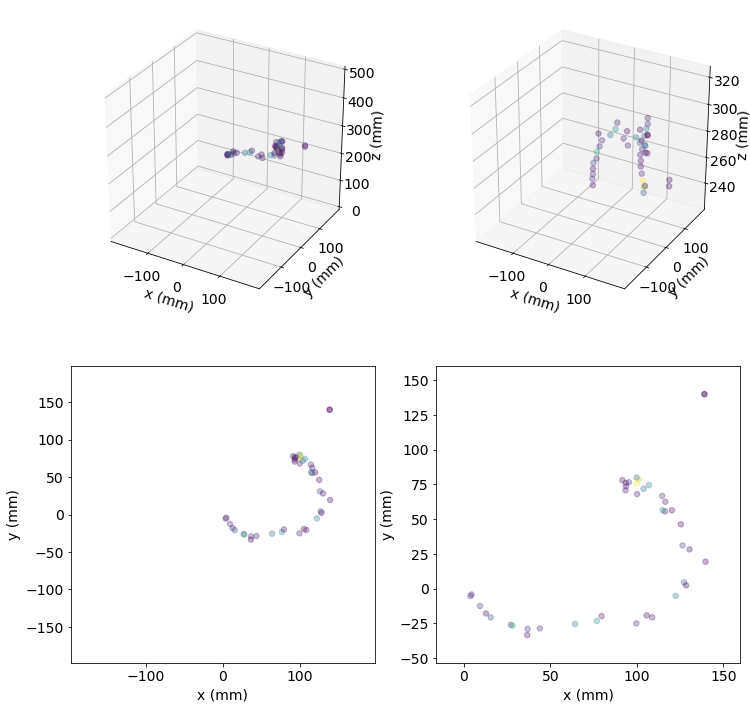

In [181]:
plot_hits_3D(hitc[1], xsc=20, ysc=20, zsc=20)

### Paolina analysis

In [182]:
vox_size = np.array([25,25,25],dtype=np.int16)    # voxel size
blob_radius = 25.                    # blob radius in mm

In [183]:
voxels, edges = paf.voxelize_hits(hitc[1], vox_size) 

In [184]:
dx = edges[0][1] - edges[0][0]
dy = edges[1][1] - edges[1][0]
dz = edges[2][1] - edges[2][0]
print(dx,dy,dz)

22.6499959928 24.7838652975 21.469375


In [185]:
voxel_size = Voxel(dx, dy, dz, 1)

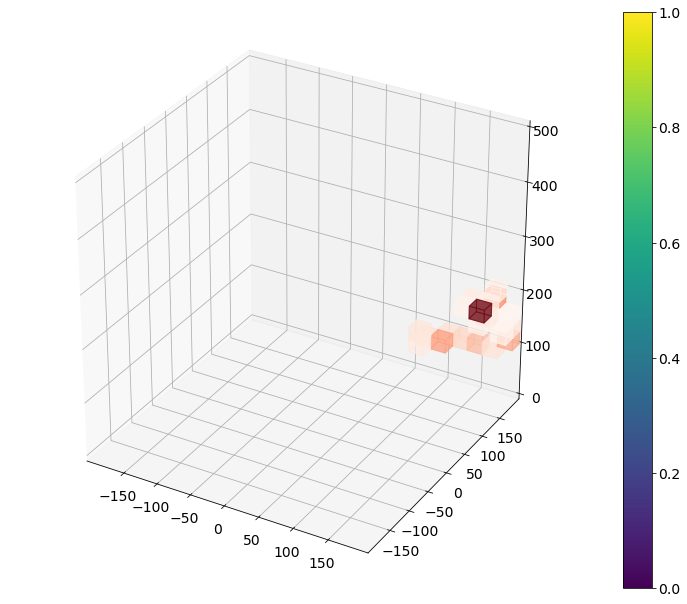

In [213]:
draw_voxels(voxels, voxel_size, xview=(-198, 198), yview=(-198, 198), zview=(0, 500), alpha=0.5, colormap='Reds')

In [199]:
tc = plf.make_tracks(1, 1, voxels,
                     vox_size,
                     contiguity   = 1,
                     blob_radius  = blob_radius)

In [200]:
tc.number_of_tracks

2

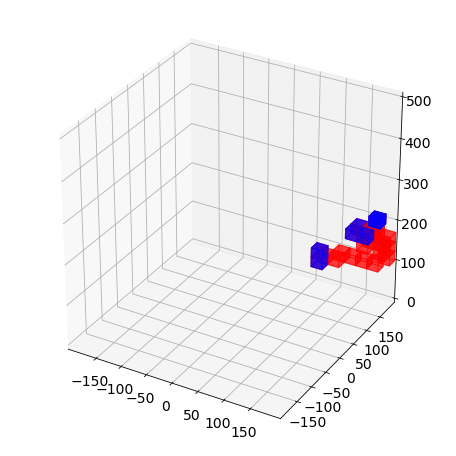

In [215]:
draw_tracks(tc, voxel_size)

In [219]:
hvt.print_tracks(tc)

trk no = 0, number of voxels = 21, energy = 249253.08187414723
voxel energies = [73430.641294014786, 267.20571151440572, 1424.308896648653, 7083.0179544850034, 8201.4910378438781, 2694.7671938319777, 22302.319585473891, 6486.0204942889413, 24737.1413925216, 2637.9248230172216, 15957.703063564149, 6485.6463828326041, 1160.50103636528, 8721.6687683662785, 1394.0753710058816, 4142.0946150514501, 28186.625578371757, 4422.3046287419729, 117.3799651766203, 11508.907416382213, 17891.336664648654]
----------------------------
blob a: number of voxels = 2, seed = <[15.14727360336411, 3.717214846192169, 252.1296875] 6485.646382832604>, energy = 10907.951011574576
blob b: number of voxels = 3, seed = <[83.09726158185647, 78.06881073868928, 252.1296875] 1424.308896648653>, energy = 78997.04480571489
intersection blobs a and blob b = 0


trk no = 1, number of voxels = 1, energy = 2008.451248869145
voxel energies = [2008.451248869145]
----------------------------
blob a: number of voxels = 1, seed =

In [79]:
trk_nof_vox = np.array([trk.number_of_voxels for trk in tc.tracks])
print(trk_nof_vox)
n_max = np.max(trk_nof_vox)
print(n_max)


[22  1]
22


In [65]:
i_max = loc_elem_1d(trk_nof_vox, n_max)
print(i_max)

3


In [67]:
def distance(va, vb):
    return np.linalg.norm(va.pos - vb.pos)

In [202]:
def print_tracks(tc, trkm):
    for trk_no, trk in enumerate(tc.tracks):
        print('trk no = {}, number of voxels = {}, energy = {}'.
              format(trk_no, trk.number_of_voxels, trk.E))
   
        ba, bb = trk.blobs
        print('----------------------------')
        print('blob a: number of voxels = {}, seed = {}, energy = {}'.
              format(ba.number_of_voxels, ba.seed, ba.E))
        print('blob b: number of voxels = {}, seed = {}, energy = {}'.
              format(bb.number_of_voxels, bb.seed, bb.E))
    
        blobs_sa = set(ba.voxels)
        blobs_sb = set(bb.voxels)
        blobs_i = blobs_sa.intersection(blobs_sb) 
   
        print('intersection blobs a and blob b = {}'.
              format(len(blobs_i)))
    
        print("""distances to reference track:
            a : a = {}        a : b = {}
            b : a = {}        b : b = {}
    """.format(distance(trkm_ba.seed, ba.seed),
               distance(trkm_ba.seed, bb.seed),
               distance(trkm_bb.seed, ba.seed),
               distance(trkm_bb.seed, bb.seed)))
    
        print('\n')
    

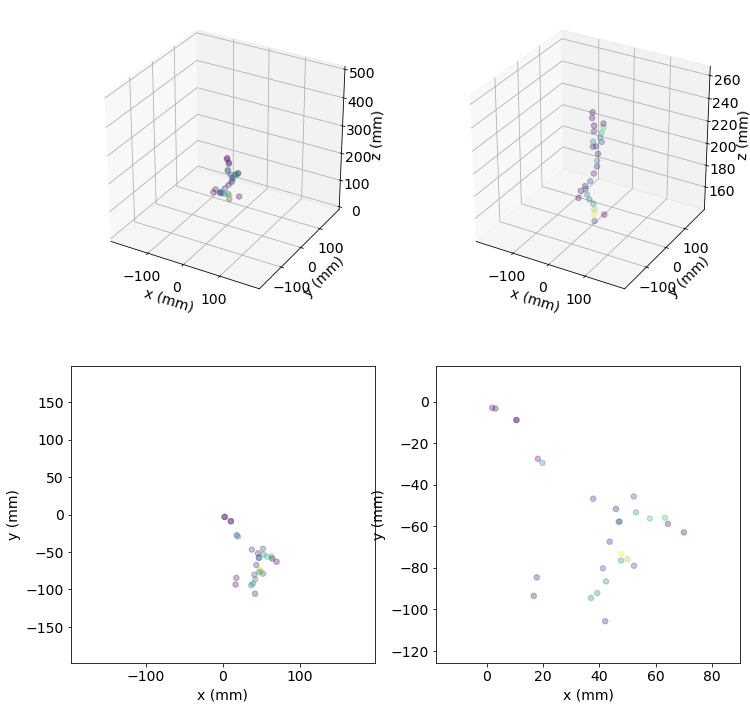

In [109]:
plot_hits_3D(hitc[2], xsc=20, ysc=20, zsc=20)

In [170]:
def draw_tracks(track_container, 
                xview=(-198, 198), yview=(-198, 198), zview=(0, 500),
                alpha=0.5, figsize=(10, 8)):

    fig = plt.figure(figsize=figsize)
    axes = fig.add_subplot(111, projection='3d', aspect='equal')
    axes.set_xlim3d(xview)
    axes.set_ylim3d(yview)
    axes.set_zlim3d(zview)

    scplot = axes.scatter([], [], c=[])
    cbar = fig.colorbar(scplot, ax=axes)
    voxel_energy = [v.E for v in voxels]
    RGBA, mapper = mpl.make_color_map(voxel_energy, alpha=alpha)
    
    for ic, trk in enumerate(track_container.tracks):
        ba, bb = trk.blobs
        for v in trk.voxels:
            make_cube(v, voxel_size, RGBA[ic+10], axes)
        for v in ba.voxels:
            make_cube(v, voxel_size, RGBA[0], axes)

        for v in bb.voxels:
            make_cube(v, voxel_size, RGBA[1], axes)



    plt.show()


In [148]:
vox_size = np.array([25,25,25],dtype=np.int16)    # voxel size
blob_radius = 50.                    # blob radius in mm

In [149]:
voxels, edges = paf.voxelize_hits(hitc[2], vox_size) 

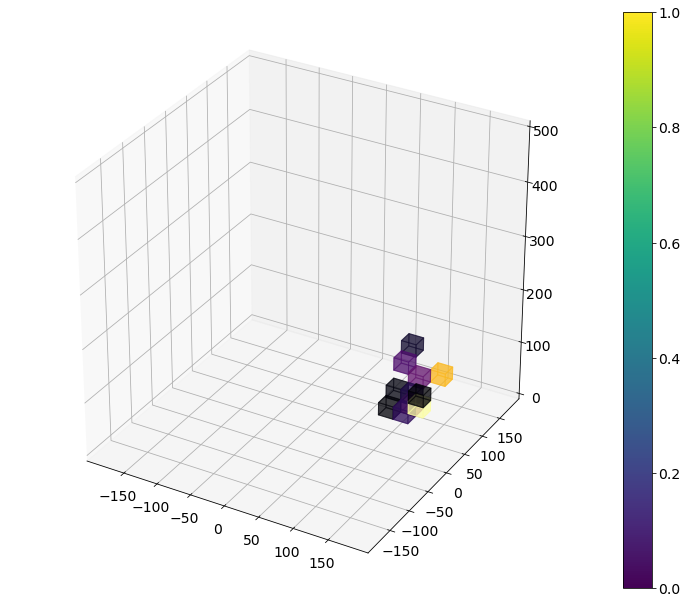

In [150]:
draw_voxels(voxels, voxel_size, xview=(-198, 198), yview=(-198, 198), zview=(0, 500), alpha=0.5)

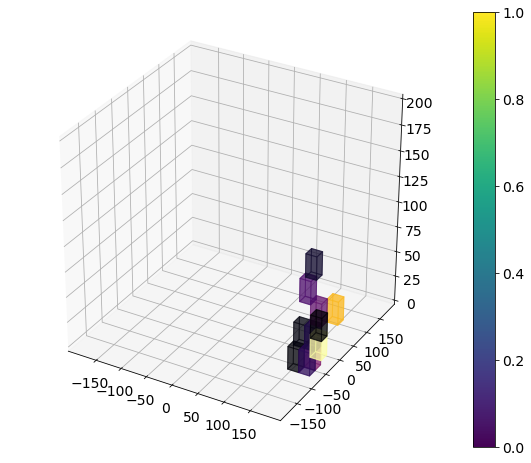

In [151]:
draw_voxels2(voxels, voxel_size, xview=(-198, 198), yview=(-198, 198), zview=(0, 200), alpha=0.5)

In [152]:
tc = plf.make_tracks(1, 1, voxels,
                     vox_size,
                     contiguity   = 1,
                     blob_radius  = 30*units.mm)

In [153]:
trk_nof_vox = np.array([trk.number_of_voxels for trk in tc.tracks])
print(trk_nof_vox)

[11]


In [154]:
print_tracks(tc, tc.tracks[0])

trk no = 0, number of voxels = 11, energy = 275342.8891115188
----------------------------
blob a: number of voxels = 3, seed = <[13.263143574818626, -95.46407065102503, 171.91708333333332] 1320.9607441536891>, energy = 17352.709741139126
blob b: number of voxels = 2, seed = <[13.263143574818626, -13.289593823304052, 234.80958333333336] 7229.986023778809>, energy = 27451.96194181614
intersection blobs a and blob b = 0
distances to longest track:
            a : a = 127.57170221504188        a : b = 24.346816946564108
            b : a = 203.530161962388        b : b = 116.28907141377435
    




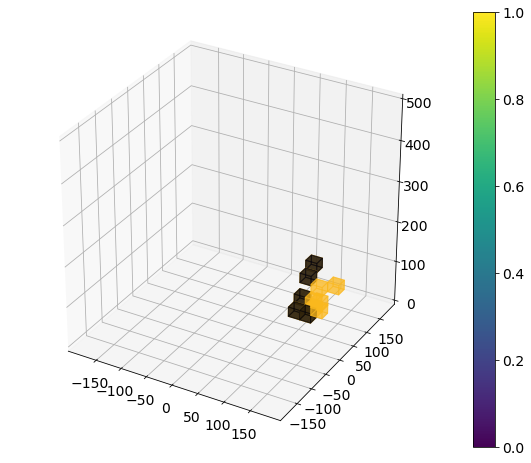

In [171]:
draw_tracks(tc, 
                xview=(-198, 198), yview=(-198, 198), zview=(0, 500),
                alpha=0.5, figsize=(10, 8))

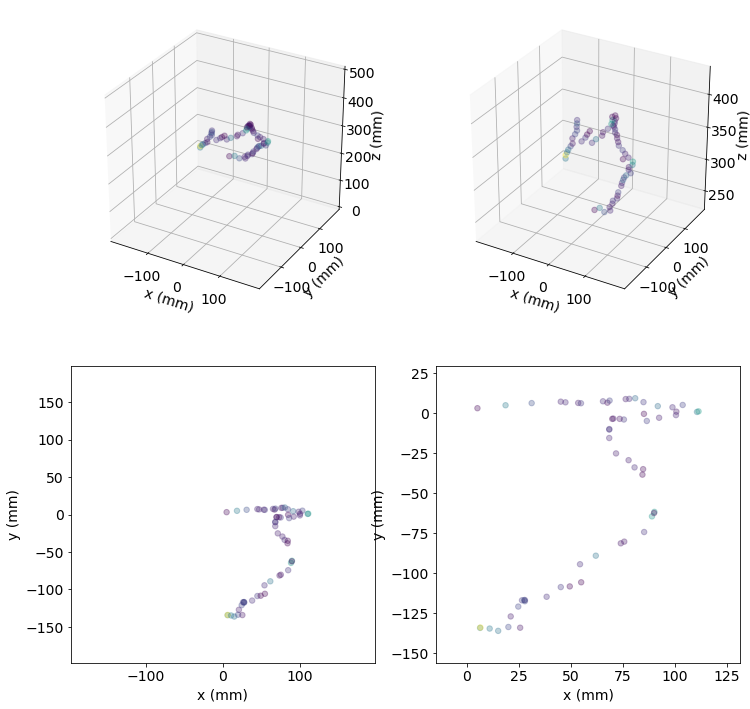

In [172]:
plot_hits_3D(hitc[3], xsc=20, ysc=20, zsc=20)

In [174]:
vox_size = np.array([25,25,25],dtype=np.int16)    # voxel size
blob_radius = 50. 
voxels, edges = paf.voxelize_hits(hitc[3], vox_size) 
tc = plf.make_tracks(1, 1, voxels,
                     vox_size,
                     contiguity   = 1,
                     blob_radius  = blob_radius)


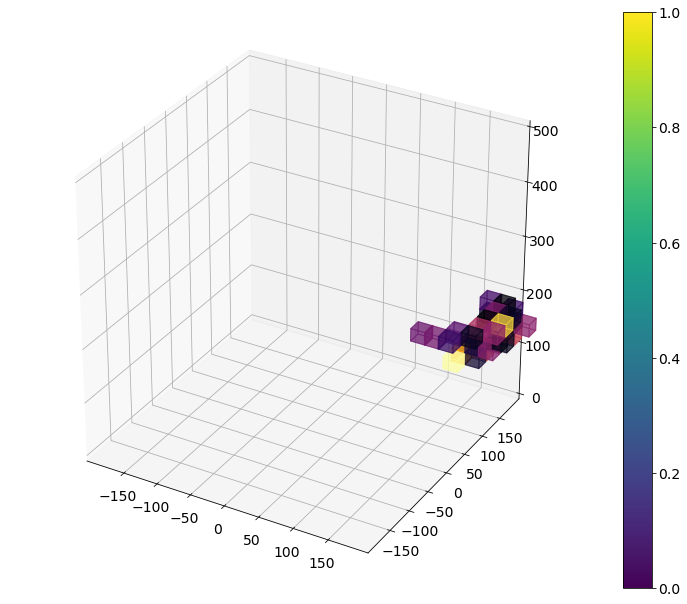

In [175]:
draw_voxels(voxels, voxel_size, xview=(-198, 198), yview=(-198, 198), zview=(0, 500), alpha=0.5)

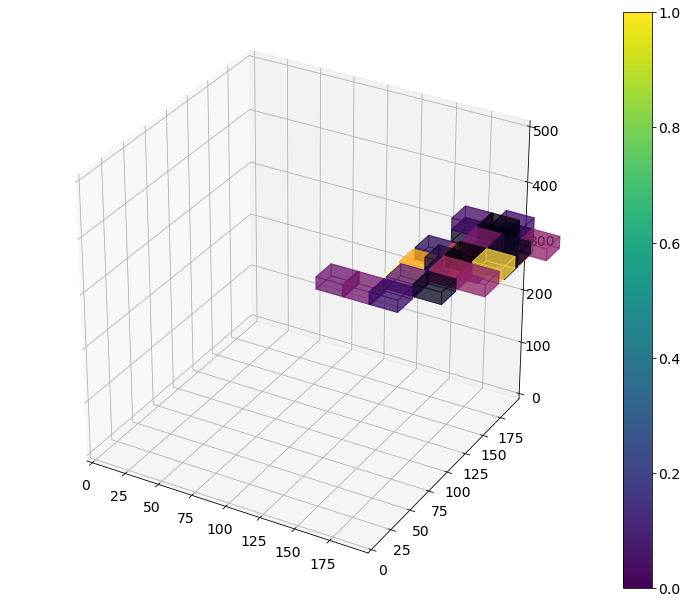

In [176]:
draw_voxels(voxels, voxel_size, xview=(0, 198), yview=(0, 198), zview=(0, 500), alpha=0.5)

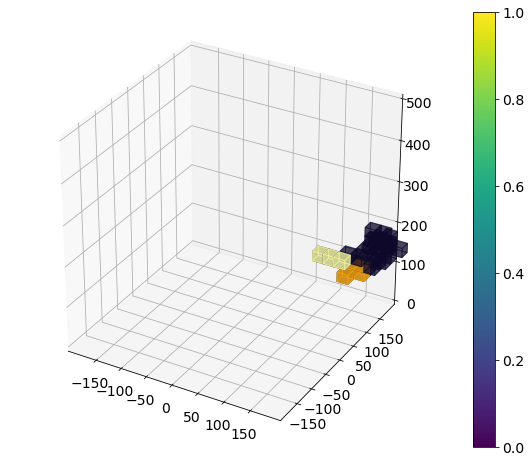

In [177]:
draw_tracks(tc, 
                xview=(-198, 198), yview=(-198, 198), zview=(0, 500),
                alpha=0.5, figsize=(10, 8))

In [178]:
print_tracks(tc, tc.tracks[0])

trk no = 0, number of voxels = 28, energy = 235779.4778857231
----------------------------
blob a: number of voxels = 3, seed = <[15.623393418436658, -2.7262487449999107, 256.73910714285716] 8968.530994859273>, energy = 24014.505675792694
blob b: number of voxels = 5, seed = <[15.623393418436658, -124.08078623778582, 355.5919642857143] 29628.4639933051>, energy = 64498.30587714873
intersection blobs a and blob b = 0
distances to longest track:
            a : a = 7.936728707300018        a : b = 164.4293115257207
            b : a = 105.36513309131911        b : b = 236.90003199740102
    


